In [1]:
import pandas as pd
import numpy as np
from collections import OrderedDict

from sklearn.preprocessing import LabelEncoder

from scipy.stats import chisquare

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def read_and_preprocess(filepath):
    
    # initial reading
    data = pd.read_csv(filepath, index_col=0)
    
    # move species from index to the table
    data["species"] = data.index
    
    # create numeric idex
    data.index = range(len(data))
    
    # create categorical feature from Phylum (string)
    data["Phylum_Numeric"] = LabelEncoder().fit_transform(data["Phylum"].tolist())
    
    # remove features we will not use
    data = data.drop(["Phylum", "species", "occurrences", "NoSpecies", 
                      "C_Cnumeric", "SC_Numeric", "MaxD_Numeric", "System_Numeric"], axis=1)
    
    # create features and target dataframes
    features = data.drop(["extinct"], axis=1)
    target = data["extinct"]
    
    # create lists with categorical and continious features' names
    continious_cols = []
    categorical_cols = features.columns.drop(continious_cols).tolist()
    
    # make list of indexes
    categorical_idx = [features.columns.tolist().index(col) for col in categorical_cols]
        
    return features, target, categorical_idx

In [3]:
def correlation_analysis(data_instance):
    
    # factorization of features
    data_instance=data_instance.apply(lambda x : pd.factorize(x)[0]) + 1
    
    corr_matrix = data_instance.corr()
    #corr_matrix = pd.DataFrame([chisquare(data_instance[x].values, f_exp=data_instance.values.T, axis=1)[0] for x in data_instance])
    
    return corr_matrix

In [4]:
def plot_results(TIN):
    
    # read and preprocess
    features, _, _ = read_and_preprocess(f"../data/TimeInterval{TIN}.csv")
    
    # correlation analysis
    cm = correlation_analysis(features)
    
    # correlation plot
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(cm, annot=True, ax=ax)
    fig.savefig(f"../results/TimeInterval{TIN}_CA_corrplot.png")
    
    # pairplot
    pp = sns.pairplot(cm)
    pp.savefig(f"../results/TimeInterval{TIN}_CA_pairplot.png")

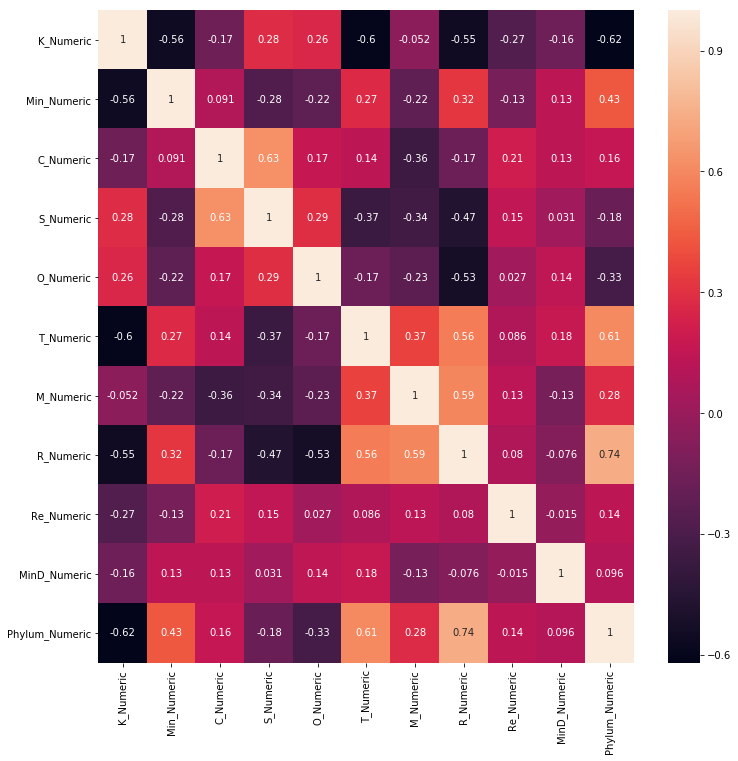

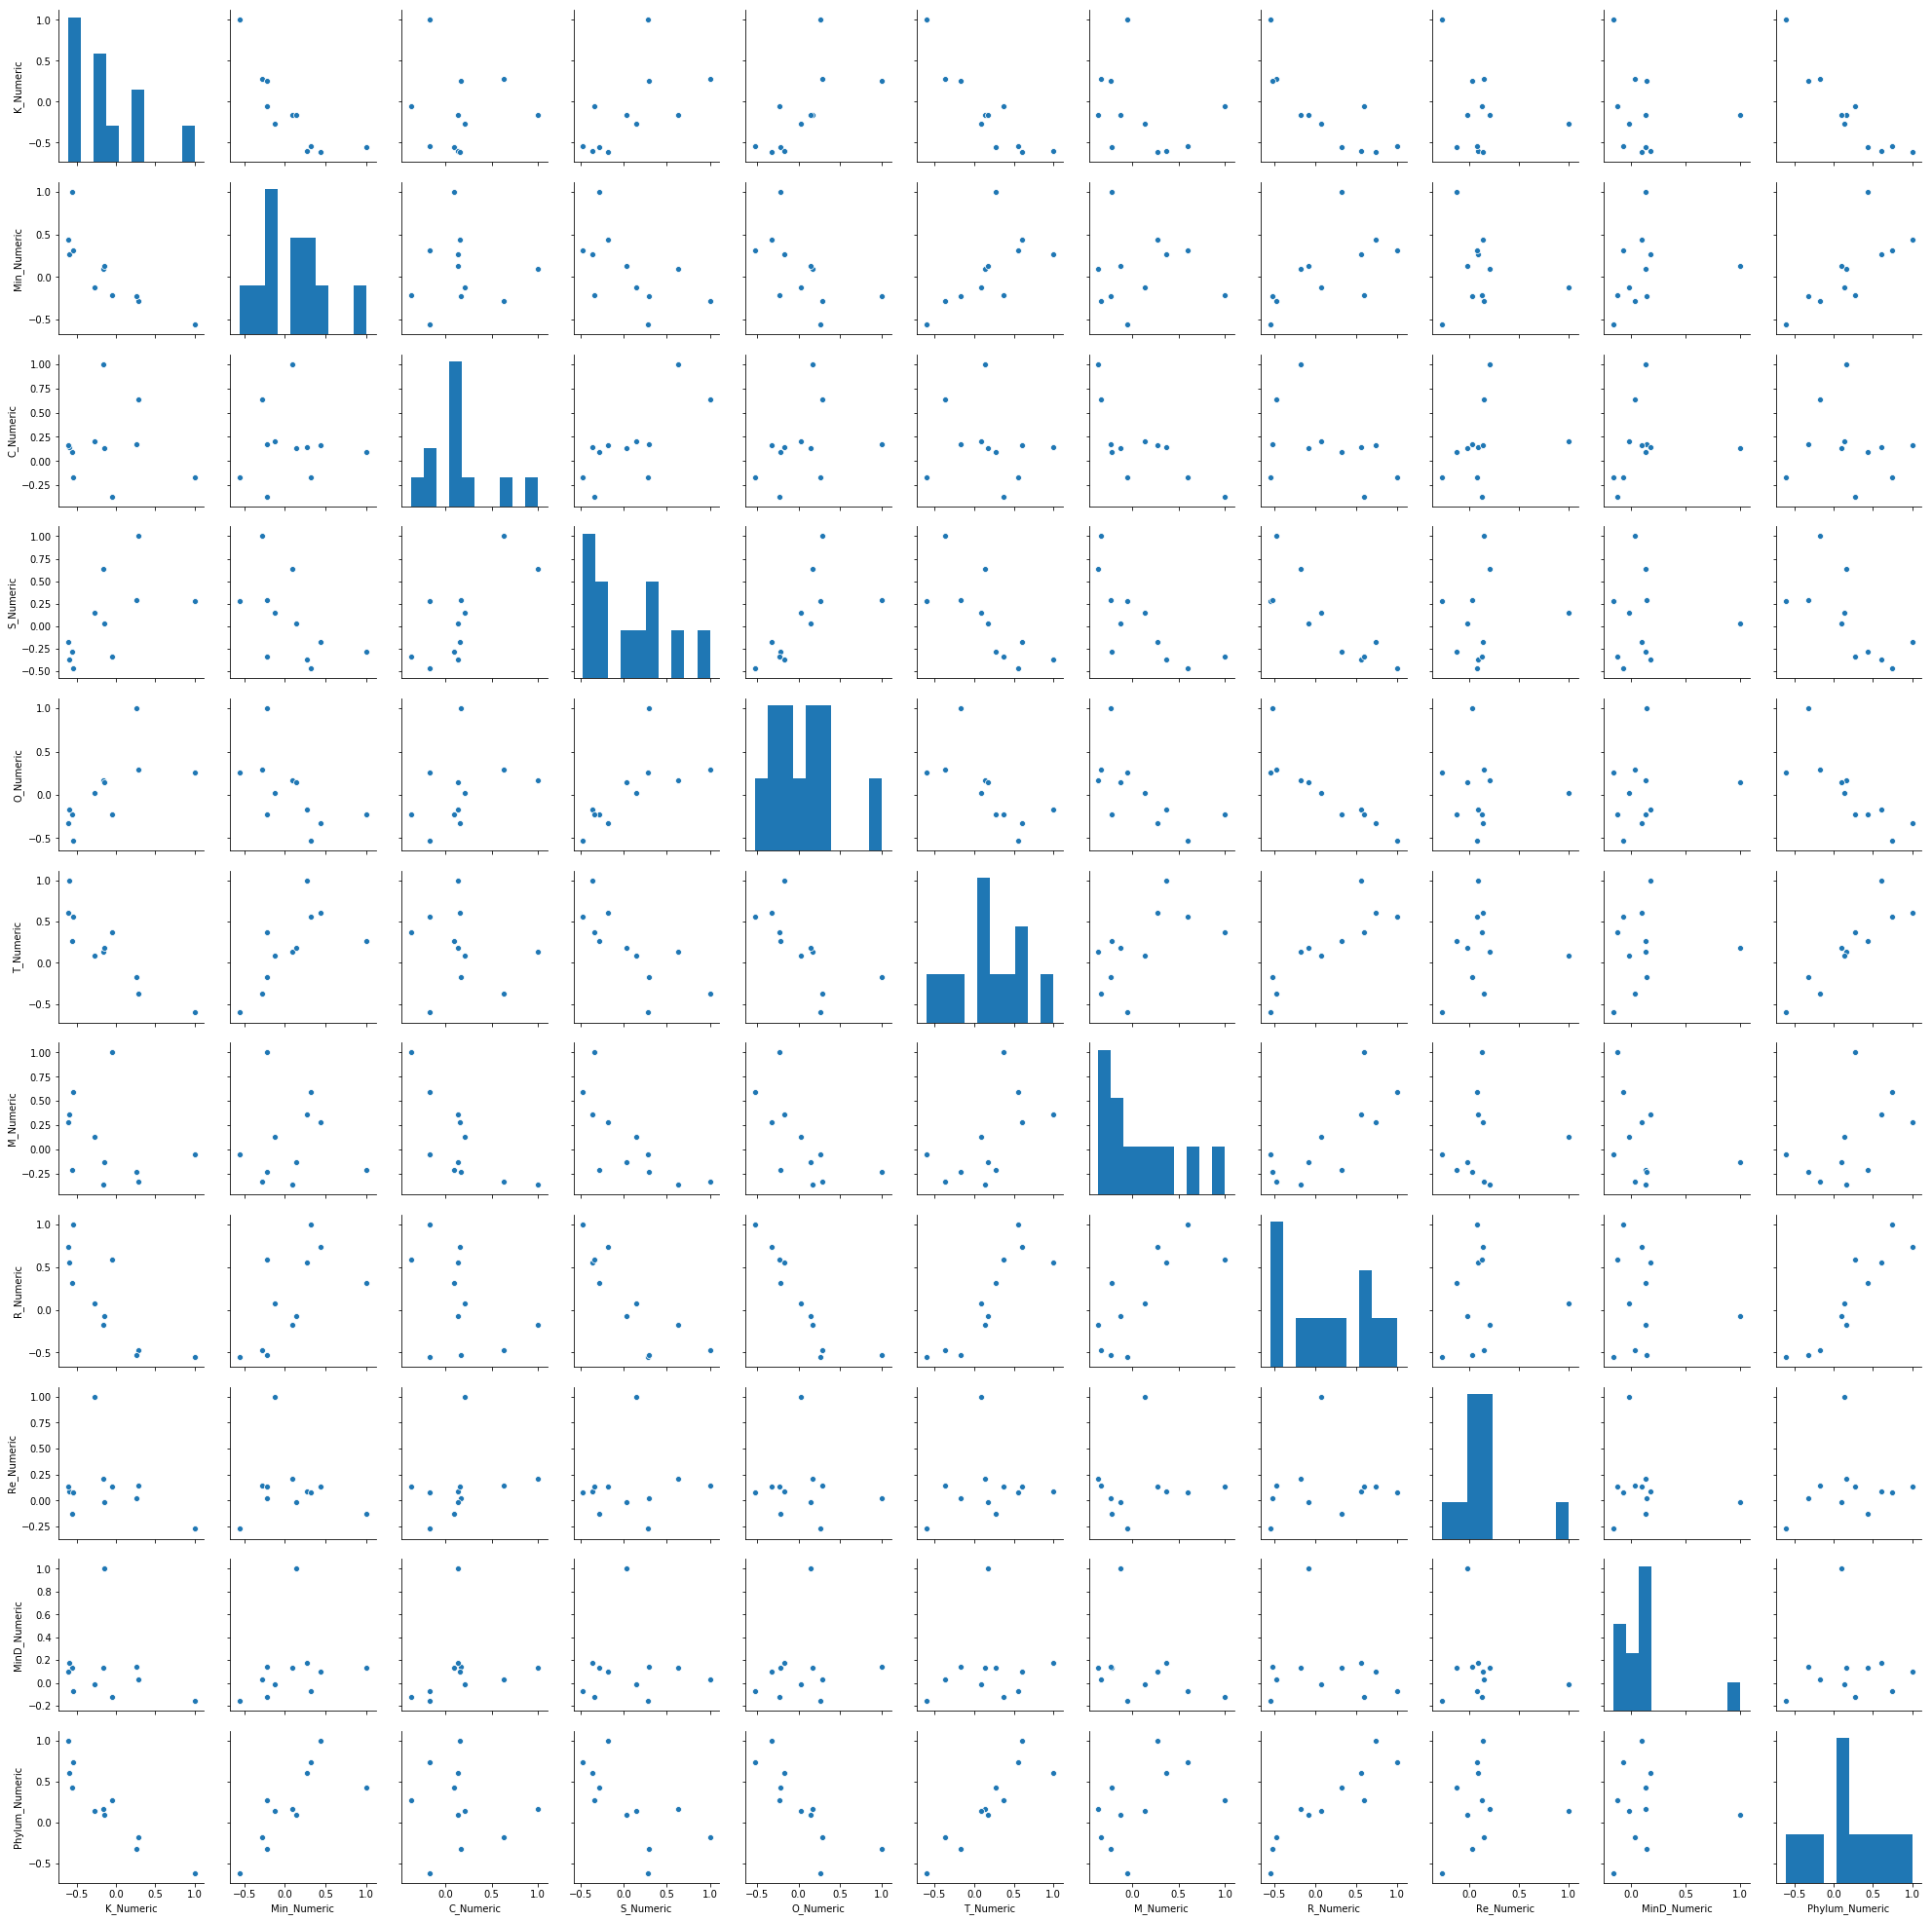

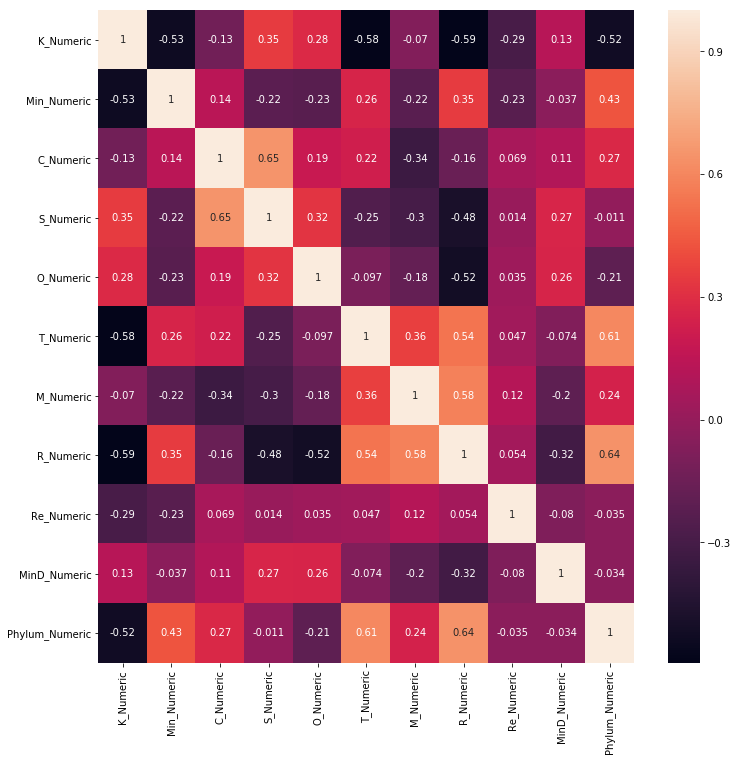

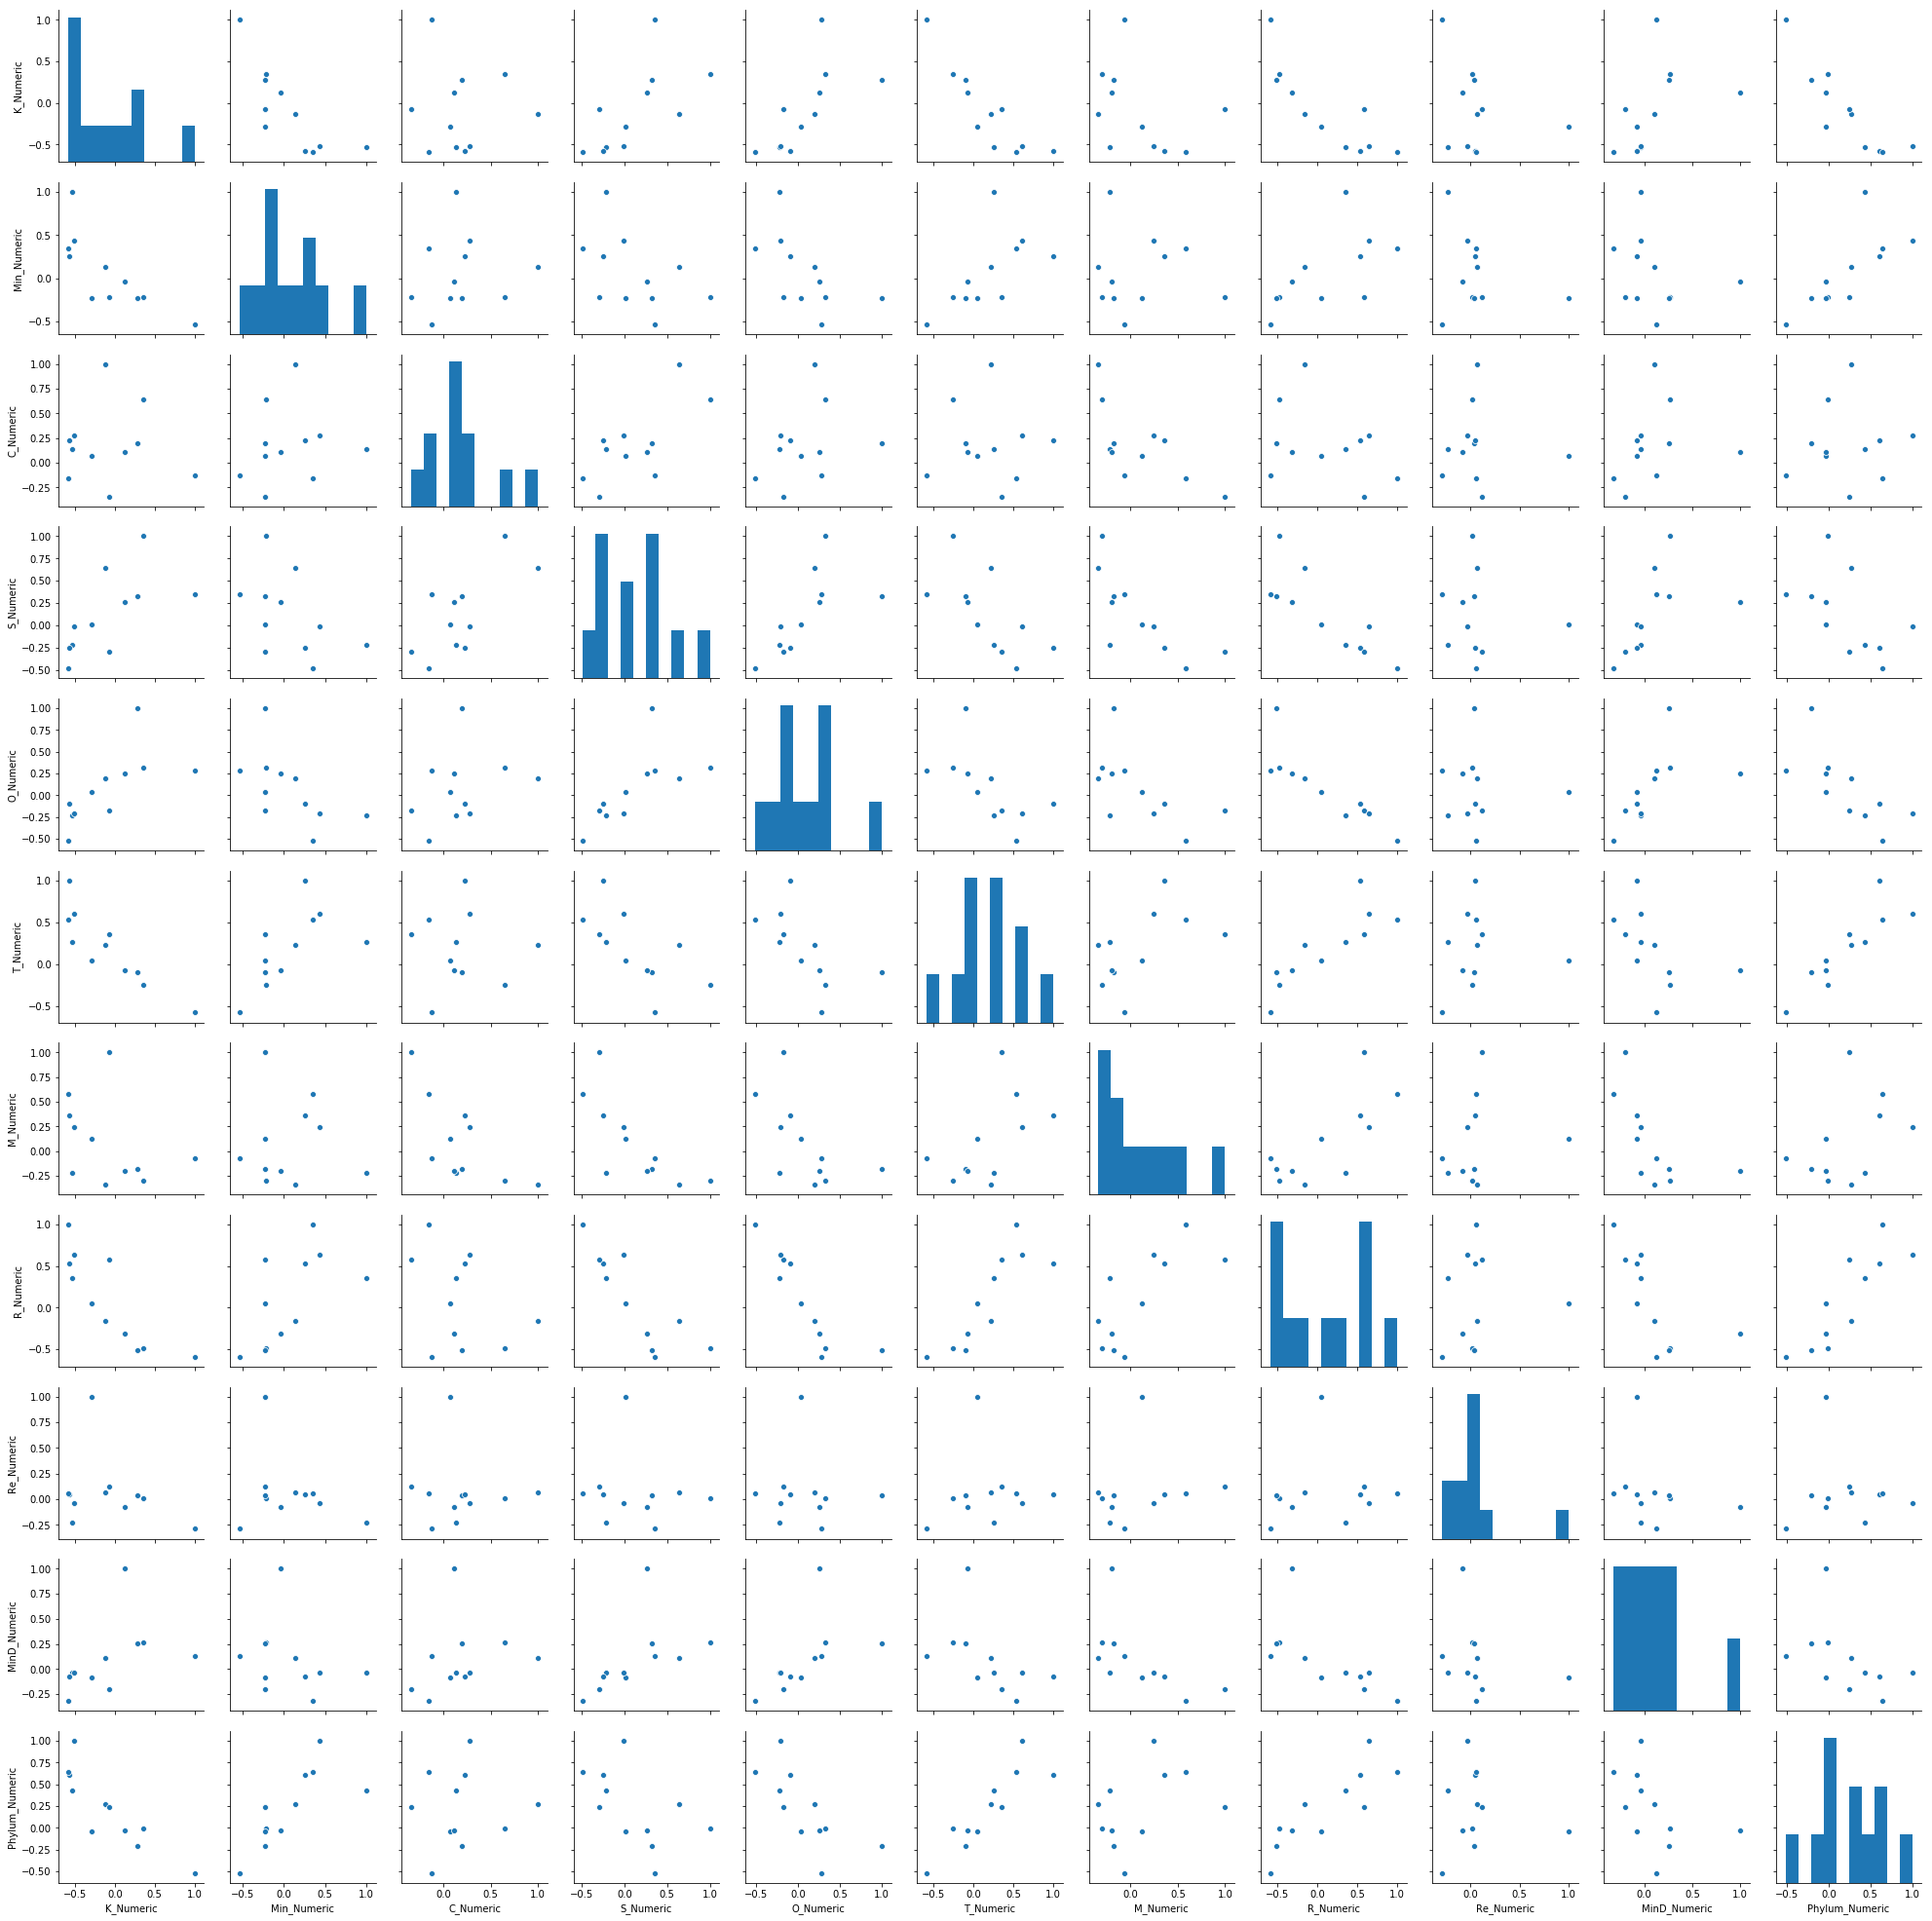

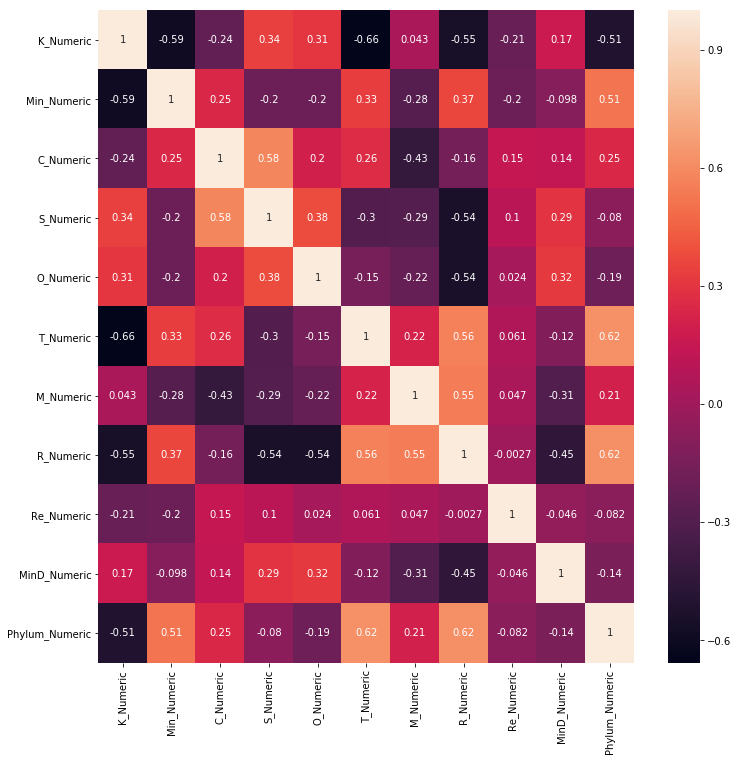

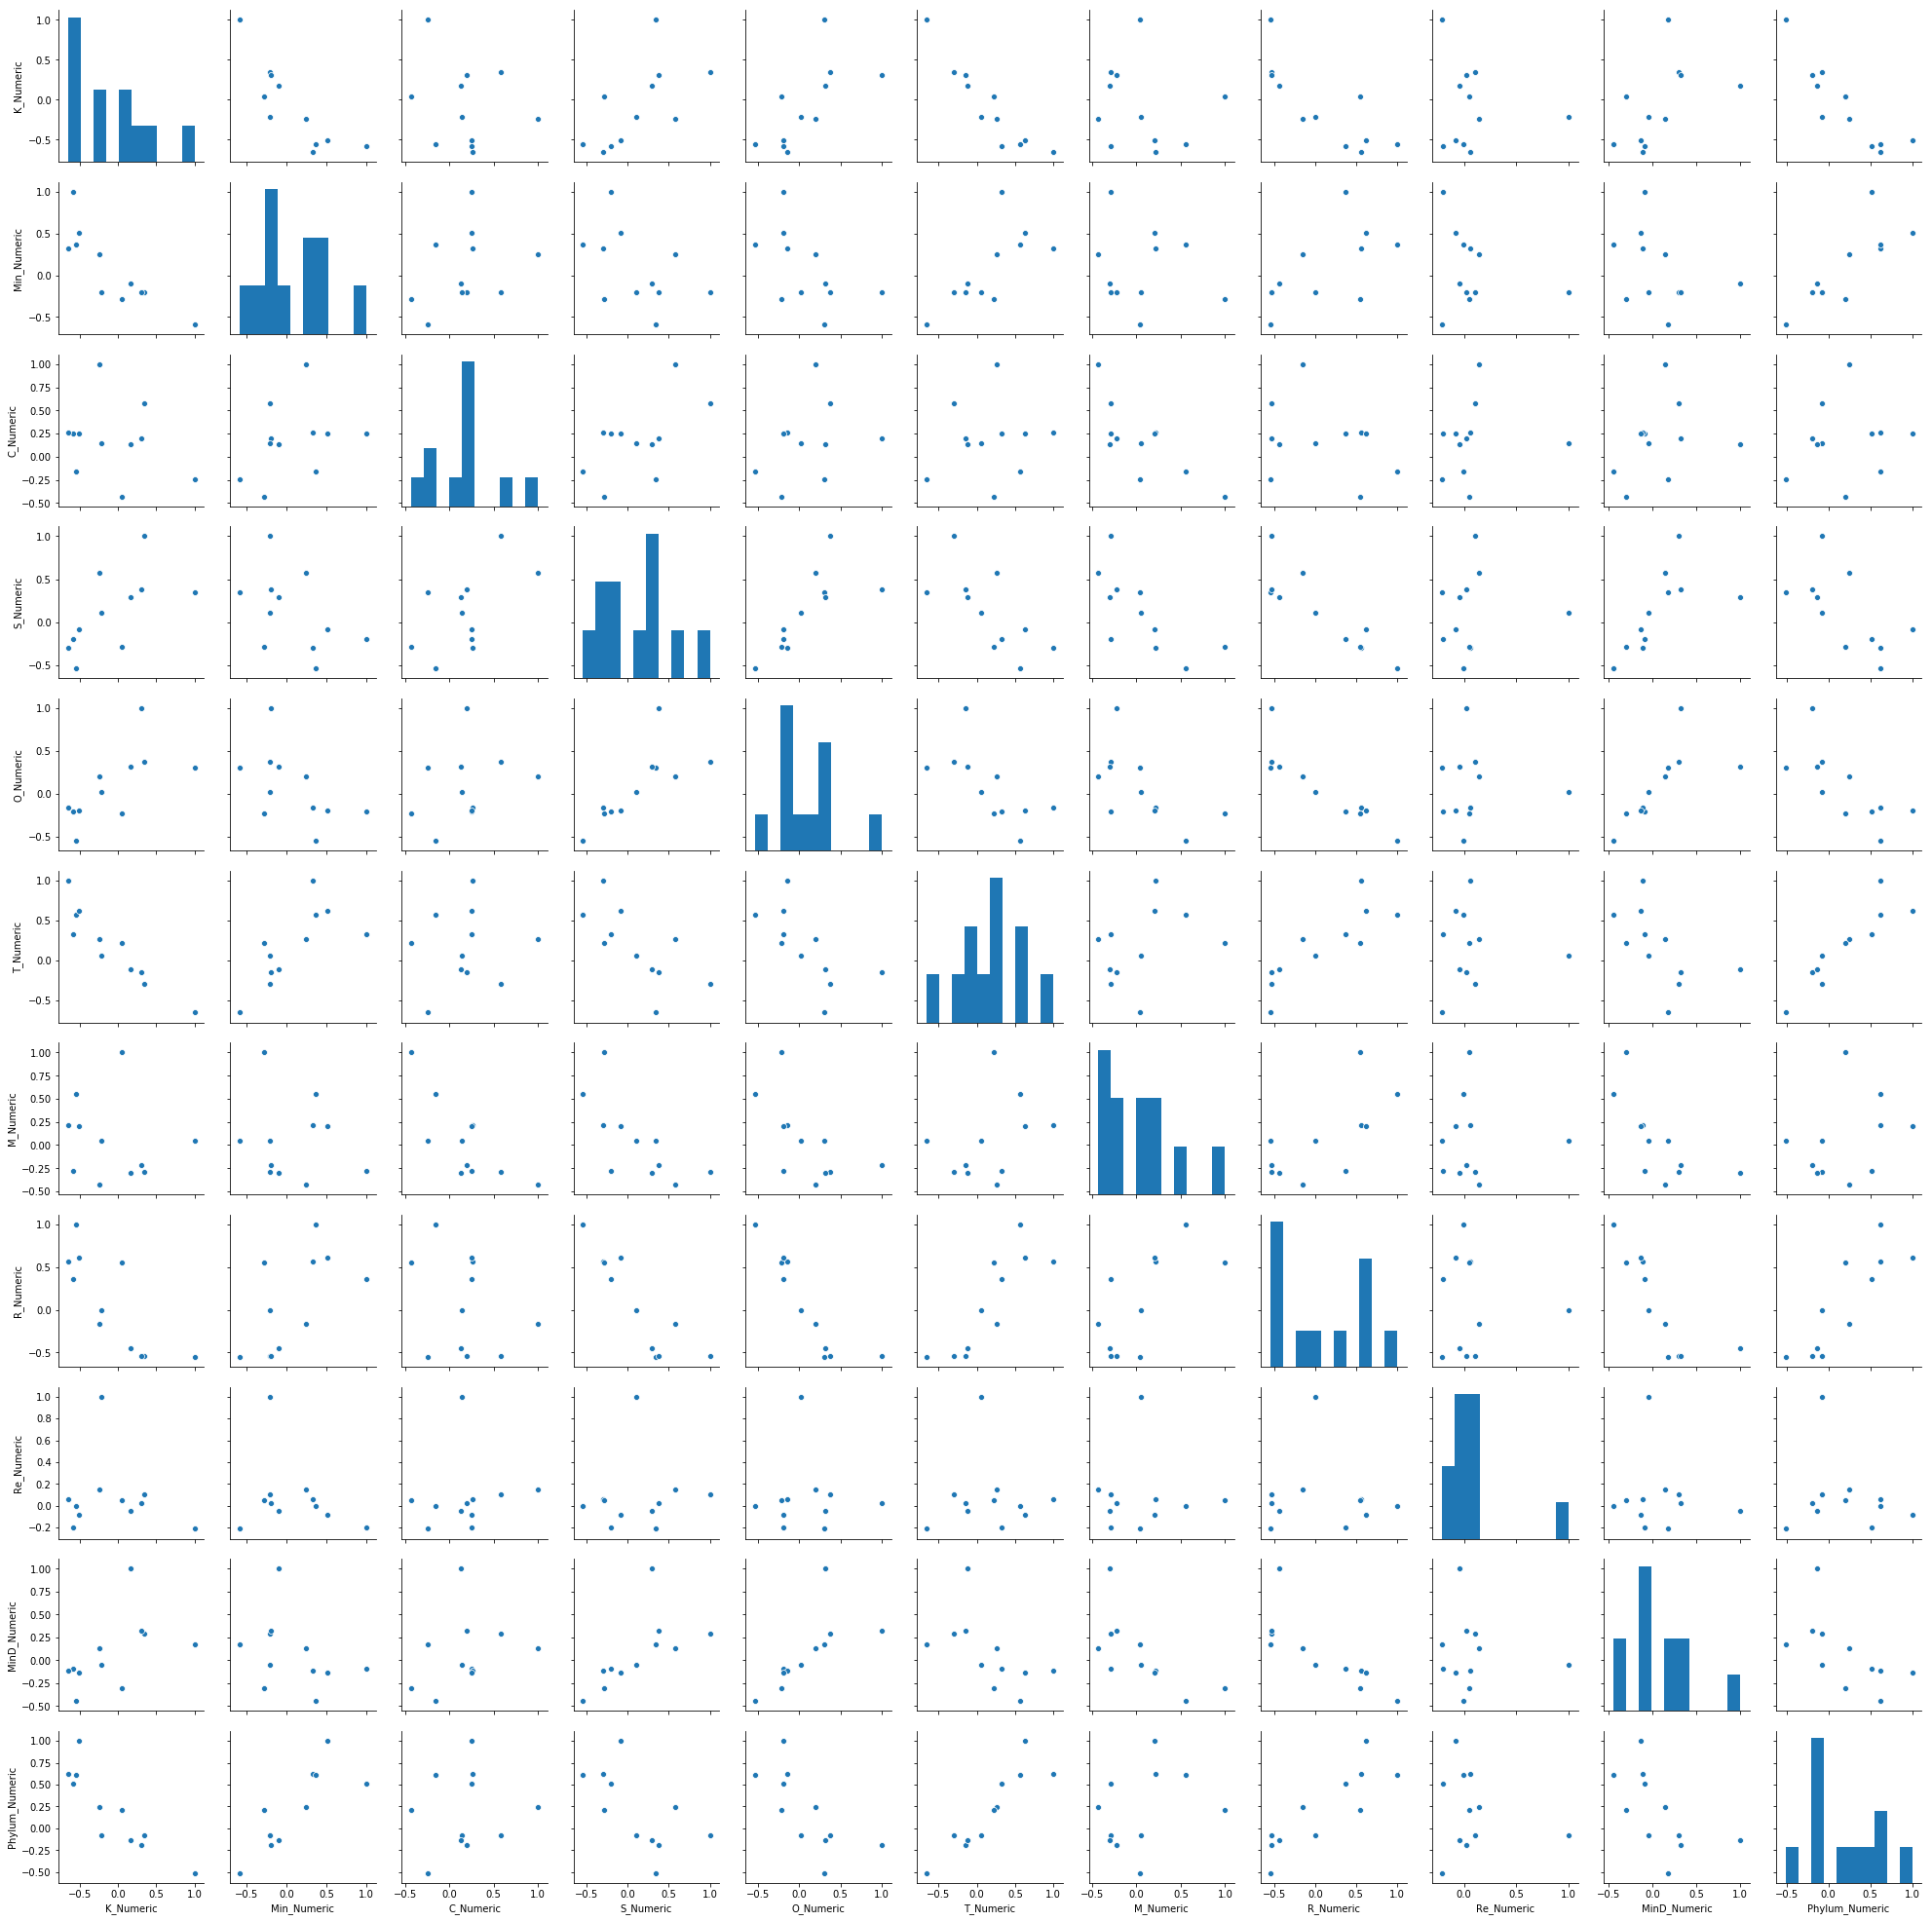

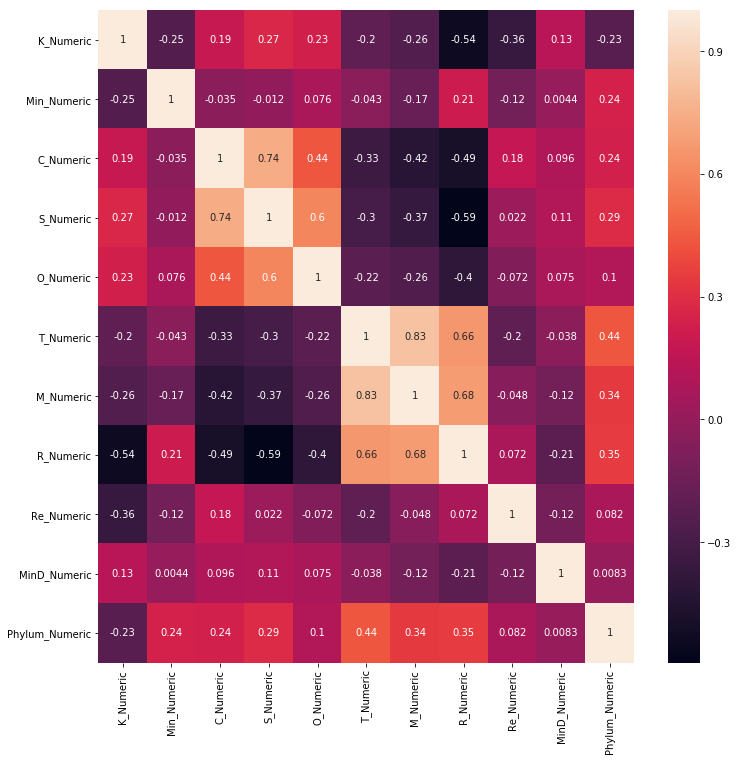

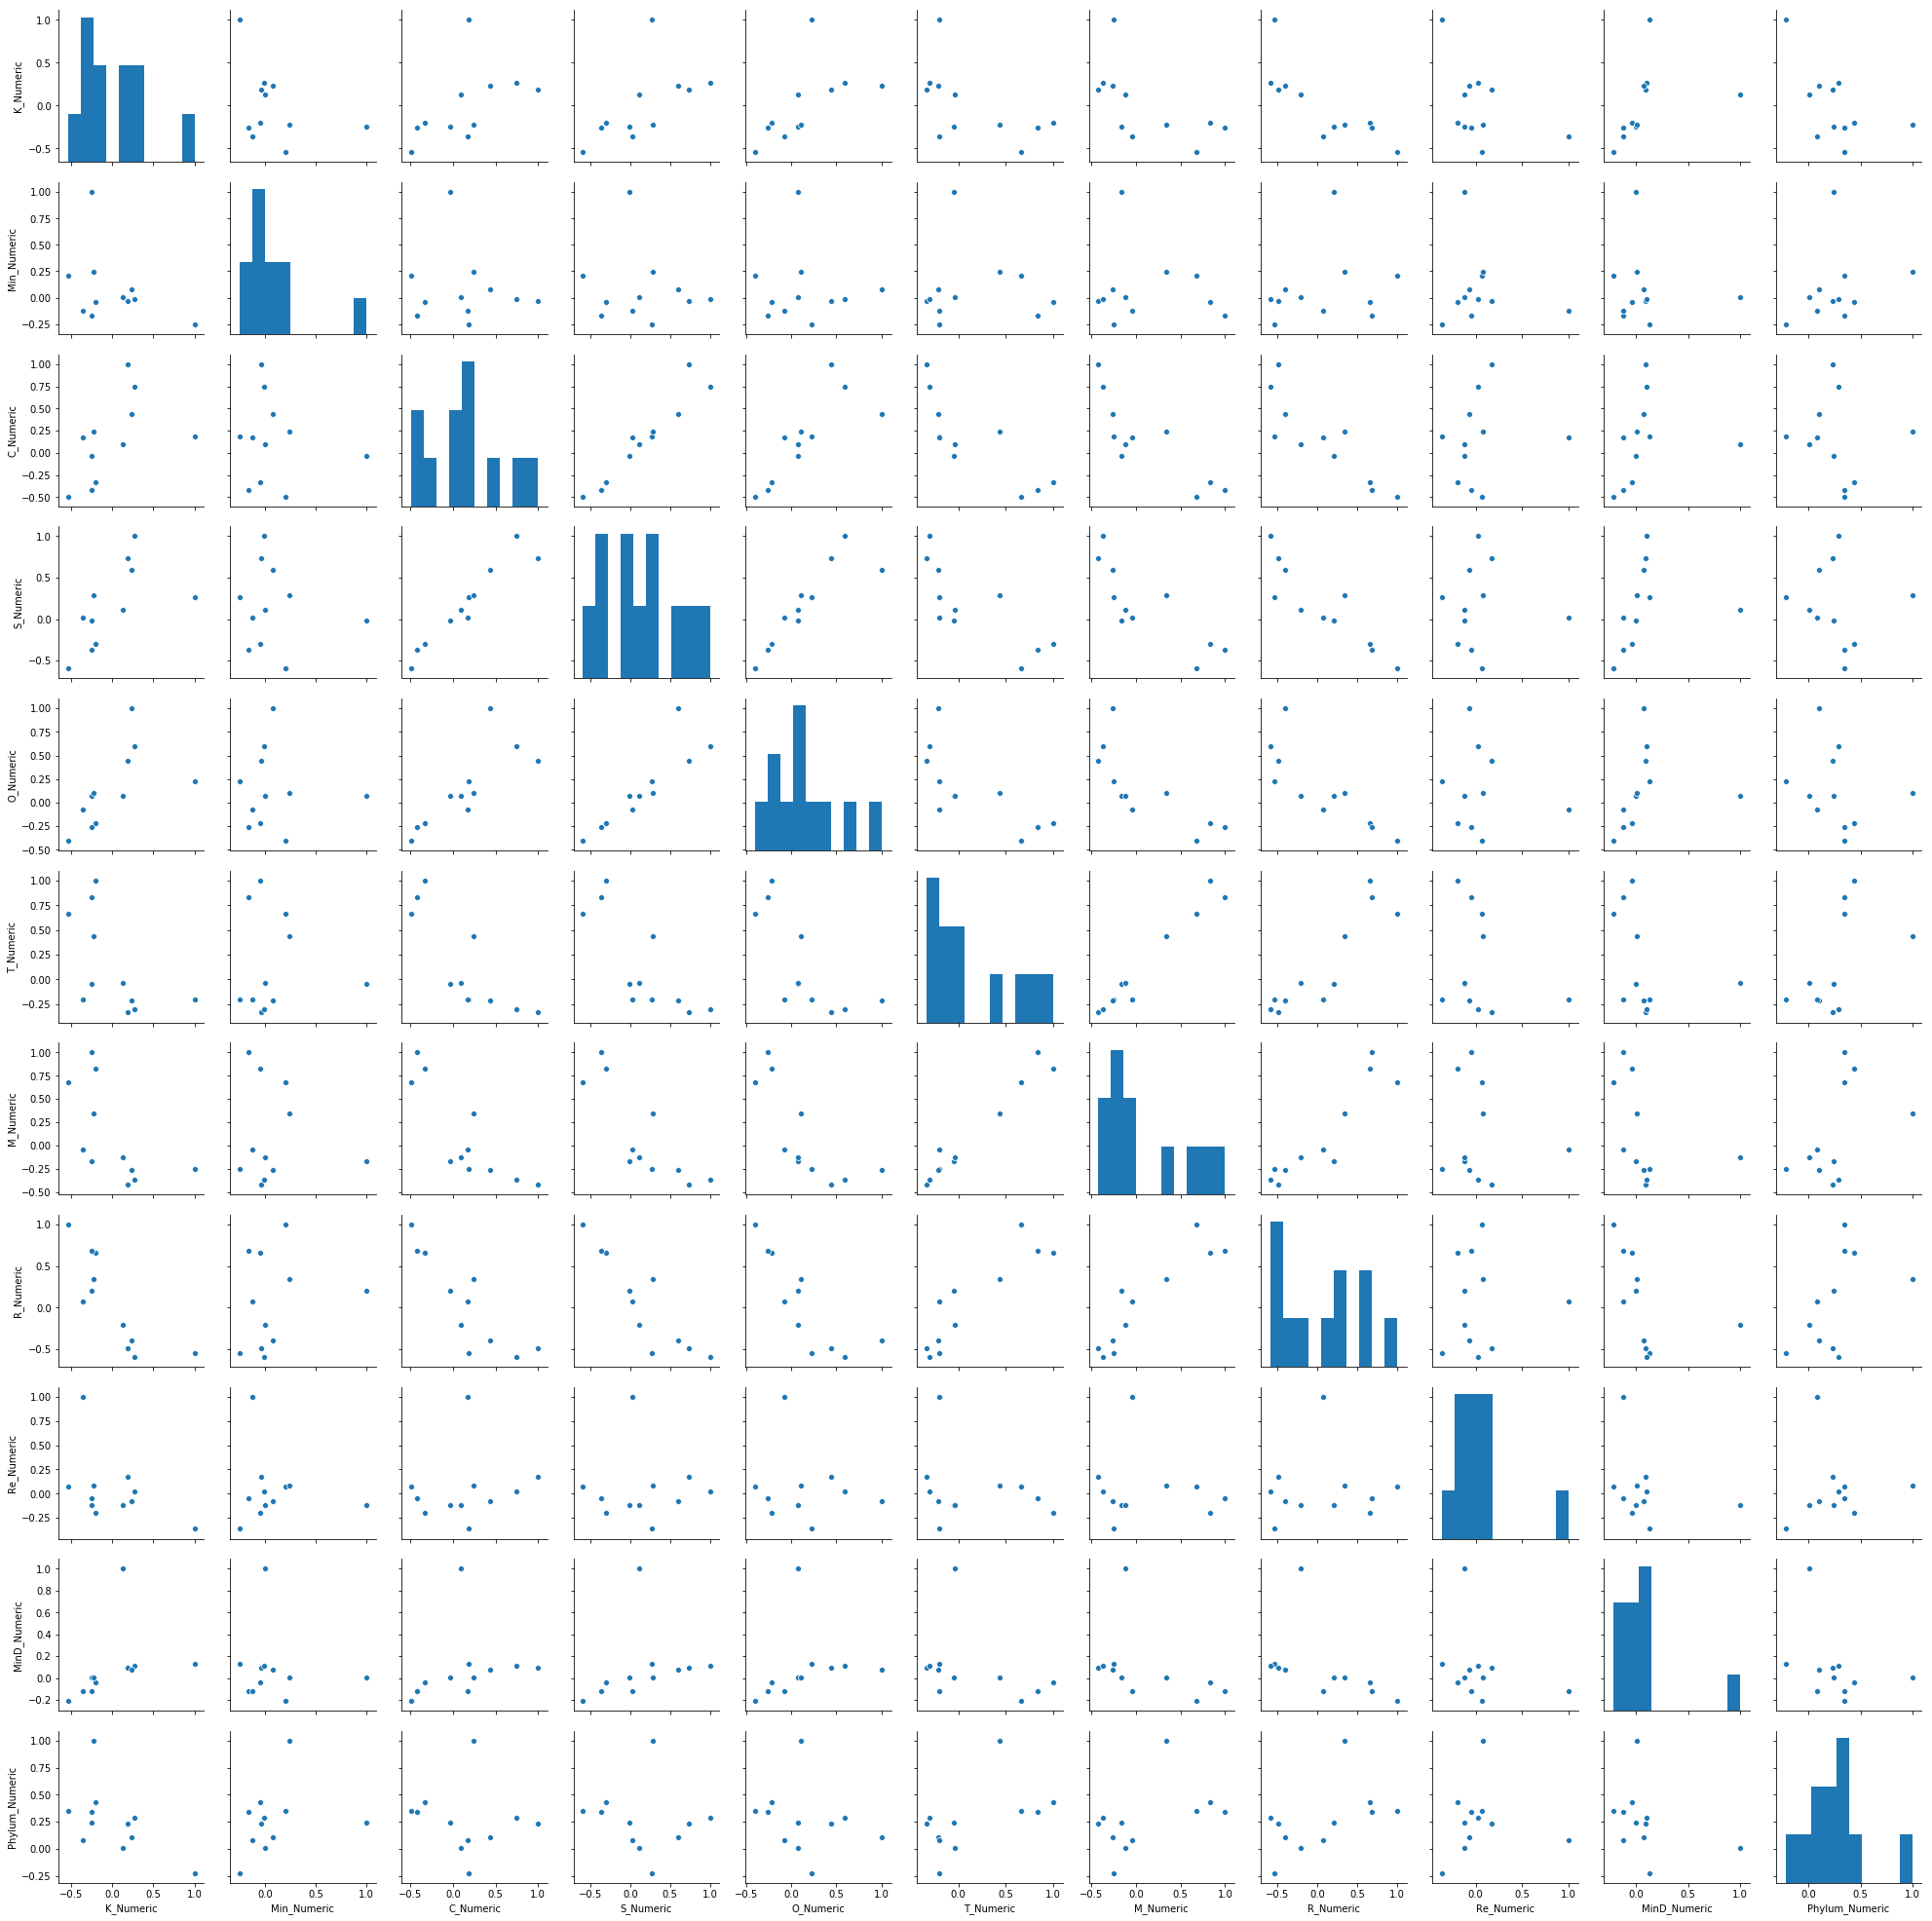

In [5]:
for i in range(1, 5):
    plot_results(i)